## This notebook will examine the Outdoor Temperature Measurments from the UW ATMS Building 

https://mesowest.utah.edu/cgi-bin/droman/download_api2.cgi?stn=UWASH&hour1=20&min1=48&timetype=LOCAL&unit=0&graph=0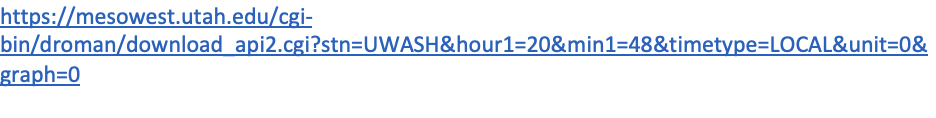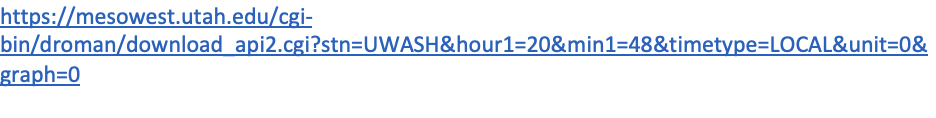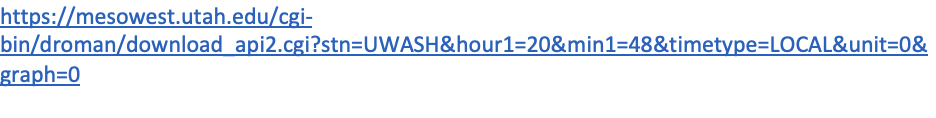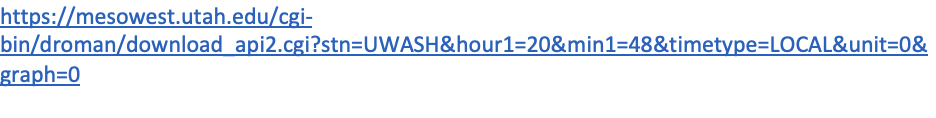

In [1]:
#import packages


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, box
import fiona
import pyproj
import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter
import requests
import matplotlib.colors as colors

#%matplotlib widget
%matplotlib inline

In [3]:
UWASH= pd.read_csv("UWASH.2022-10-24.csv", sep=',', header=[10])
UWASH.head()

,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,precip_accum_set_1,sea_level_pressure_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,wind_cardinal_direction_set_1d,heat_index_set_1d
0,NaN,NaN,Celsius,%,m/s,Degrees,m/s,Millimeters,Pascals,Celsius,Celsius,code,Celsius
1,UWASH,2022-01-01T12:55:00Z,-3.89,88.18,0.51,332.0,1.03,0.0,102390.0,-5.58,NaN,NNW,NaN
2,UWASH,2022-01-01T13:55:00Z,-3.33,88.23,0.51,69.0,1.03,0.0,102380.0,-5.02,NaN,ENE,NaN
3,UWASH,2022-01-01T14:55:00Z,-2.78,84.66,1.54,107.0,2.06,0.0,102410.0,-5.04,NaN,ESE,NaN
4,UWASH,2022-01-01T15:55:00Z,-2.78,81.17,0.51,104.0,1.54,0.0,102410.0,-5.6,NaN,ESE,NaN


In [4]:
list(UWASH.columns)

['Station_ID',
 'Date_Time',
 'air_temp_set_1',
 'relative_humidity_set_1',
 'wind_speed_set_1',
 'wind_direction_set_1',
 'wind_gust_set_1',
 'precip_accum_set_1',
 'sea_level_pressure_set_1',
 'dew_point_temperature_set_1d',
 'wind_chill_set_1d',
 'wind_cardinal_direction_set_1d',
 'heat_index_set_1d']

In [5]:
UWASH= UWASH.drop(0,axis=0)

In [6]:
UWASH.Date_Time= pd.to_datetime(UWASH.Date_Time)

cols = UWASH.columns.drop(['Date_Time','wind_cardinal_direction_set_1d'])

UWASH[cols] = UWASH[cols].apply(pd.to_numeric, errors='coerce')

UWASH.head(5)

,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,precip_accum_set_1,sea_level_pressure_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,wind_cardinal_direction_set_1d,heat_index_set_1d
1,NaN,2022-01-01 12:55:00+00:00,-3.89,88.18,0.51,332.0,1.03,0.0,102390.0,-5.58,NaN,NNW,NaN
2,NaN,2022-01-01 13:55:00+00:00,-3.33,88.23,0.51,69.0,1.03,0.0,102380.0,-5.02,NaN,ENE,NaN
3,NaN,2022-01-01 14:55:00+00:00,-2.78,84.66,1.54,107.0,2.06,0.0,102410.0,-5.04,NaN,ESE,NaN
4,NaN,2022-01-01 15:55:00+00:00,-2.78,81.17,0.51,104.0,1.54,0.0,102410.0,-5.60,NaN,ESE,NaN
5,NaN,2022-01-01 16:55:00+00:00,-2.78,84.66,0.00,122.0,0.00,0.0,102460.0,-5.04,NaN,ESE,NaN


In [7]:
UWASH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7084 entries, 1 to 7084
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   Station_ID                      0 non-null      float64            
 1   Date_Time                       7084 non-null   datetime64[ns, UTC]
 2   air_temp_set_1                  7084 non-null   float64            
 3   relative_humidity_set_1         6516 non-null   float64            
 4   wind_speed_set_1                7084 non-null   float64            
 5   wind_direction_set_1            7083 non-null   float64            
 6   wind_gust_set_1                 7084 non-null   float64            
 7   precip_accum_set_1              1268 non-null   float64            
 8   sea_level_pressure_set_1        6365 non-null   float64            
 9   dew_point_temperature_set_1d    6516 non-null   float64            
 10  wind_chill_s

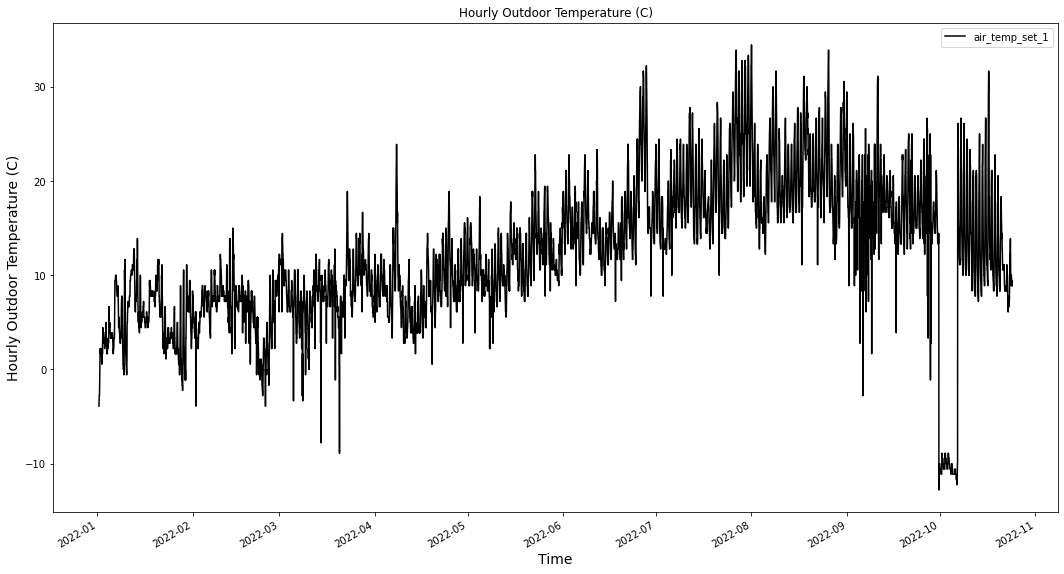

In [8]:
fig,ax = plt.subplots(figsize=(18,10))

ax.set_title('Hourly Outdoor Temperature (C)')

UWASH.plot(x='Date_Time', y='air_temp_set_1',color='k', markerfacecolor='white', ax=ax)

ax.set_xlabel("Time",fontsize=14)

ax.set_ylabel("Hourly Outdoor Temperature (C)",color='k',fontsize=14);

#UWASH.plot(x='Date_Time', y='relative_humidity_set_1', color='dodgerblue', marker='*', markerfacecolor='white', ax=ax2)

#ax2.set_ylabel("Hourly Relative Humidity (%)",fontsize=14, color='dodgerblue');
#ax2.get_legend().remove()
#ax.get_legend().remove()
#ax2.invert_yaxis()
#ax2.set_ylim(-20,30)

#plt.show();

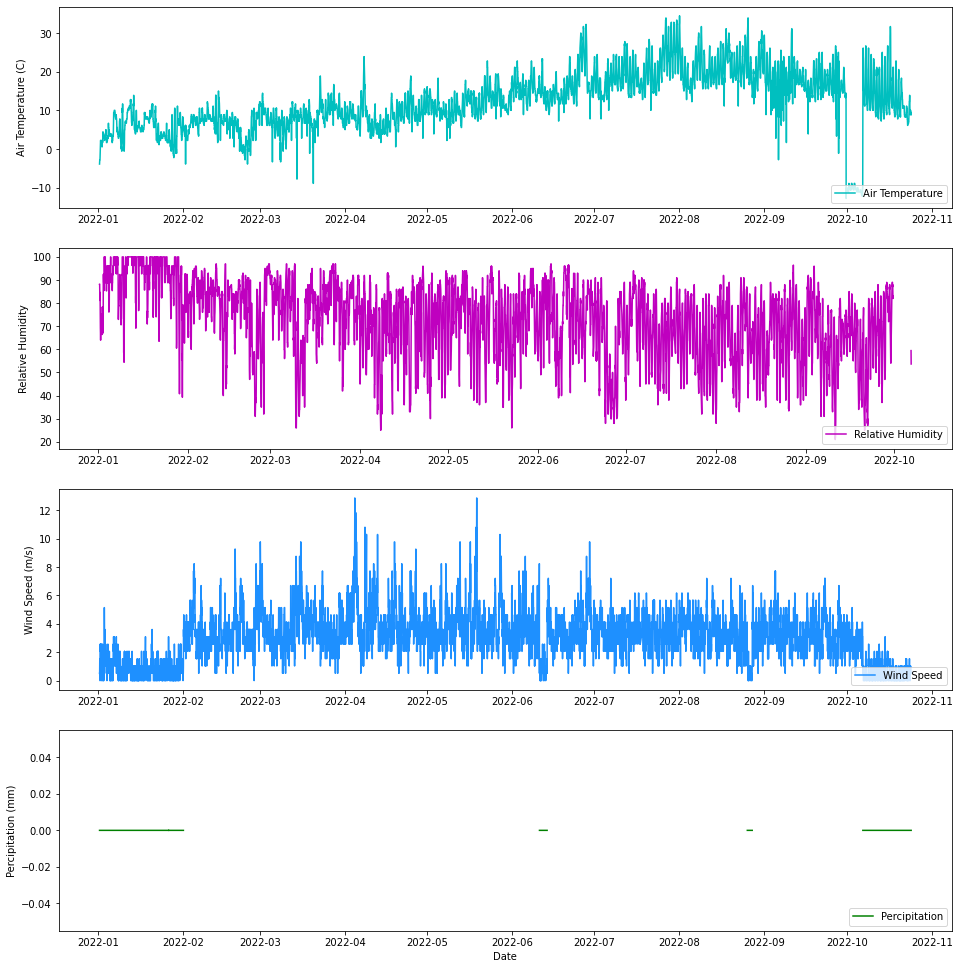

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(16,17))

x1 = UWASH['Date_Time']
y1 = UWASH['air_temp_set_1']

ax1.plot(x1, y1, label = "Air Temperature", color='c', markerfacecolor='white')



#Axis Labels 
ax1.set_ylabel('Air Temperature (C)')


x2 = UWASH['Date_Time']
y2 = UWASH['relative_humidity_set_1']

ax2.plot(x2, y2, label = "Relative Humidity", color='m',  markerfacecolor='white')

#Axis Labels 
ax2.set_ylabel('Relative Humidity')
#ax2.set_title('Monthy Mean Air Temperature at Pirbadet')


x3 = UWASH['Date_Time']
y3 = UWASH['wind_speed_set_1']

ax3.plot(x3, y3, label = "Wind Speed", color='dodgerblue', markerfacecolor='white')


#Axis Labels 
ax3.set_ylabel('Wind Speed (m/s)')
#ax3.set_xlabel('Date')
#ax3.set_title('Monthy Degre Day at Pirbadet')
# show a legend on the plot

ax2.legend(loc='lower right')



ax1.legend(loc='lower right')
ax3.legend(loc='lower right')


x4 = UWASH['Date_Time']
y4 = UWASH['precip_accum_set_1']

ax4.plot(x4, y4, label = "Percipitation", color='g',  markerfacecolor='white')
#axs.set_xlim(pd.Timestamp('2007-12-01 00:00'), pd.Timestamp('2022-05-01 00:00'))
#ax4.set_xlim(pd.Timestamp('2014-11-01 00:00'), pd.Timestamp('2022-05-01 00:00'))


#Axis Labels 
ax4.set_ylabel('Percipitation (mm)')
ax4.set_xlabel('Date')


# show a legend on the plot

ax4.legend(loc='lower right')

# Display a figure.
plt.show()